### Preprocessing and Exploratory Data Analysis

Problem Statement : Predict the outcome of a loan based on the given features. The given features are:

        Loan_ID : Unique Loan ID 
        Gender : Male/ Female 
        Married : Applicant Married (Y/N) 
        Dependents : Number of Dependents 
        Education : Applicant Education (Graduate/ Under Graduate) 
        Self_Employed : Self Employed (Y/N) 
        ApplicantIncome : Applicant Income 
        CoapplicantIncome : Co-applicant Income 
        LoanAmount : Loan Amount in Thousands 
        Loan_Amount_Term : Term of Loan in Months 
        Credit_History : Credit History meets Guidelines 
        Property_Area : Urban/ Semi Urban/ Rural 
        Loan_Status (Target) : Loan approved (Y/N)

Approach :
    
In this Notebook we will conduct basic exploratory data analysis and also impute data for basic analysis. Model Building will be done in the next NoteBook.
    
Basic analysis includes examine different variables through univariate and multivariate analysis. If there are key takeaway points for further analysis, those would be discussed and if necessary necessary actions will be taken for the further preprocessing or feature engineering.
    
After basic examination of the data through spread sheets, the following points are concluded:

    1. There are 614 records with 13 features.
    2. The dataset has higher number of categorical variables.
    3. Features like Gender, Married,Dependents,Self_Employed,LoanAmount, Loan_Amount_Term and Credit History suffer from missing values. Based on the percentage of the missing values different techniques are implemented. 
    4. Features like Gender,Married,Dependents,Self_Employed,Loan_Amount_Term have lower number of missing values. So these missing values are imputed based on the most frequent value of the respective features.
    5. Using laws of generality, LoanAmount is an important feature to decide the application of the outcome but since there are few missing alues in this column we assume that the loan amount can be imputed to average loan amount lent to other customers based on Property_Area, gender, number of dependents, marital status and education.
    6. After careful examination of various plots, Credit History seemed to be an important contributor to the outcome of the application. And Credit History has higher number of missing values. Using laws of generality, credit History reflects the strength of the customer in honouring his payments and this feature cannot be infered from any of the features available. Assuming that education levels can help in maintaining decent credit history, credit History is imputed based on the values of Education.
    7. Loan Amount is expressed in units of ('000s). Loan amount is multiplied with a factor of 1000 to remove the units.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline  

from sklearn.impute import SimpleImputer
imp_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

ModuleNotFoundError: No module named 'missingno'

In [2]:
df = pd.read_csv('./Data/train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.isna().sum()/len(df)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [5]:
df['LoanAmount'] = df['LoanAmount']*1000
df['Total_Income'] = df['ApplicantIncome']+df['CoapplicantIncome']

#df['Loan_ratio1'] =df['LoanAmount']/df['ApplicantIncome']
#df['Loan_ratio2'] =df['LoanAmount']/df['Total_Income']

# Imputing Gender, Married, Dependents, Self Employed and Loan_Amount_Term based on most frequent values.
z = imp_freq.fit_transform(df[['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term']])


NameError: name 'imp_freq' is not defined

In [6]:

new = pd.concat([pd.DataFrame(z,columns = ['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term']),
           df.drop(['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term'],axis = 1)],axis = 1)
new = new[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area','Total_Income','Loan_Status',
       ]]
new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360,1.0,Urban,5849.0,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128000.0,360,1.0,Rural,6091.0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66000.0,360,1.0,Urban,3000.0,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120000.0,360,1.0,Urban,4941.0,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141000.0,360,1.0,Urban,6000.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71000.0,360,1.0,Rural,2900.0,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40000.0,180,1.0,Rural,4106.0,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253000.0,360,1.0,Urban,8312.0,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187000.0,360,1.0,Urban,7583.0,Y


In [6]:
new.isna().sum()

NameError: name 'new' is not defined

In [7]:
loan_null = new[new['LoanAmount'].isna() == True]
loan_not_null = new[new['LoanAmount'].isna() == False]
loan_null

NameError: name 'new' is not defined

In [10]:
sns.barplot(x = 'Property_Area',y = 'Loan_Status',data = df)

ValueError: Neither the `x` nor `y` variable appears to be numeric.

In [9]:
x = new.groupby(['Property_Area','Gender','Married','Dependents'])['LoanAmount'].mean().reset_index()

In [10]:
loan_null = loan_null.merge(x,how = 'left',on = ['Property_Area','Gender','Married','Dependents']).drop('LoanAmount_x',axis = 1)

In [11]:
loan_null.columns = ['Loan_ID', 'Gender', 'Married', 'Dependents','Education',
                     'Self_Employed','ApplicantIncome', 'CoapplicantIncome',
                     'Loan_Amount_Term','Credit_History', 'Property_Area', 'Total_Income', 
                     'Loan_Status', 'LoanAmount']
loan_null

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Loan_Status,LoanAmount
0,LP001002,Male,No,0,Graduate,No,5849,0.0,360,1.0,Urban,5849.0,Y,130371.428571
1,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,360,1.0,Urban,4342.0,Y,147510.638298
2,LP001213,Male,Yes,1,Graduate,No,4945,0.0,360,0.0,Rural,4945.0,N,149875.000000
3,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,360,1.0,Semiurban,2395.0,Y,156260.869565
4,LP001326,Male,No,0,Graduate,No,6782,0.0,360,NaN,Urban,6782.0,N,130371.428571
5,LP001350,Male,Yes,0,Graduate,No,13650,0.0,360,1.0,Urban,13650.0,Y,147510.638298
6,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,360,1.0,Semiurban,8235.0,Y,145103.448276
7,LP001392,Female,No,1,Graduate,Yes,7451,0.0,360,1.0,Semiurban,7451.0,Y,112428.571429
8,LP001449,Male,No,0,Graduate,No,3865,1640.0,360,1.0,Rural,5505.0,Y,144416.666667
9,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,180,1.0,Urban,3992.0,N,171400.000000


In [12]:
loan_null = loan_null[loan_not_null.columns]

In [13]:
new = loan_null.append(loan_not_null)
new.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Total_Income          0
Loan_Status           0
dtype: int64

In [14]:
new['Ratio'] = new['LoanAmount']/new['Total_Income']
new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Loan_Status,Ratio
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130371.428571,360,1.0,Urban,5849.0,Y,22.289524
1,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,147510.638298,360,1.0,Urban,4342.0,Y,33.972971
2,LP001213,Male,Yes,1,Graduate,No,4945,0.0,149875.000000,360,0.0,Rural,4945.0,N,30.308392
3,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,156260.869565,360,1.0,Semiurban,2395.0,Y,65.244622
4,LP001326,Male,No,0,Graduate,No,6782,0.0,130371.428571,360,NaN,Urban,6782.0,N,19.223154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71000.000000,360,1.0,Rural,2900.0,Y,24.482759
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40000.000000,180,1.0,Rural,4106.0,Y,9.741841
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253000.000000,360,1.0,Urban,8312.0,Y,30.437921
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187000.000000,360,1.0,Urban,7583.0,Y,24.660425


<AxesSubplot:xlabel='Ratio'>

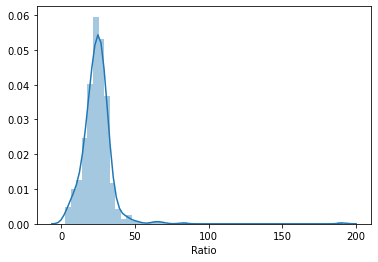

In [15]:
sns.distplot(new['Ratio'])

<AxesSubplot:>

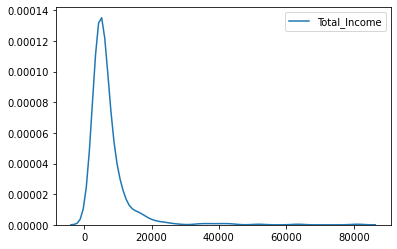

In [16]:
sns.kdeplot(new['Total_Income'])

<AxesSubplot:>

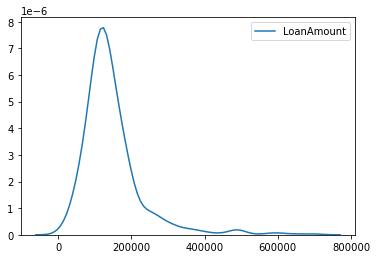

In [17]:
sns.kdeplot(new['LoanAmount'])

<AxesSubplot:>

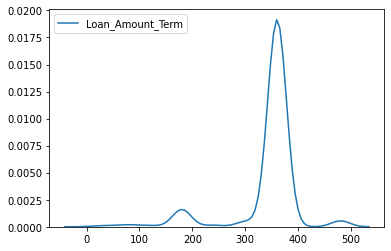

In [18]:
sns.kdeplot(new['Loan_Amount_Term'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

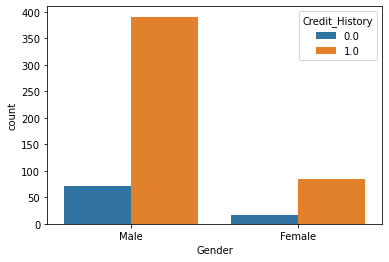

In [19]:
sns.countplot(x = 'Gender',hue = 'Credit_History',data = new)

<AxesSubplot:xlabel='Married', ylabel='count'>

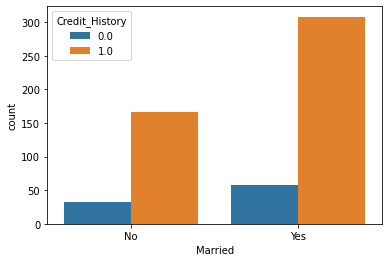

In [20]:
sns.countplot(x = 'Married',hue = 'Credit_History',data = new)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

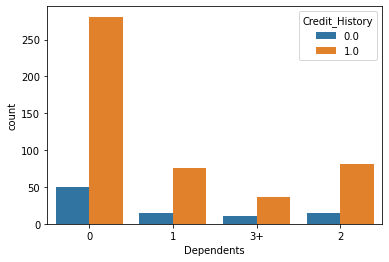

In [21]:
sns.countplot(x = 'Dependents',hue = 'Credit_History',data = new)

<AxesSubplot:xlabel='Education', ylabel='count'>

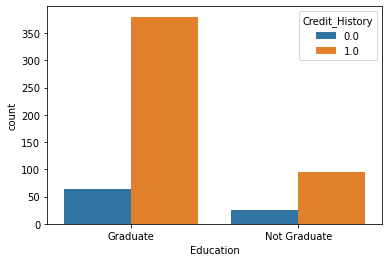

In [22]:
sns.countplot(x = 'Education',hue = 'Credit_History',data = new) 

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

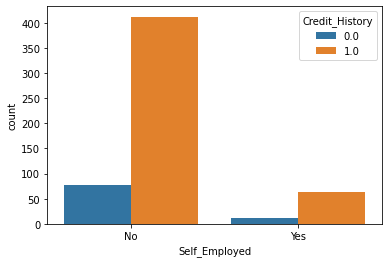

In [23]:
sns.countplot(x = 'Self_Employed',hue = 'Credit_History',data = new) 

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

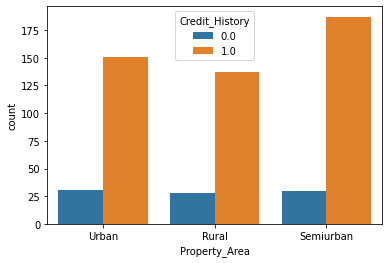

In [24]:
sns.countplot(x = 'Property_Area',hue = 'Credit_History',data = new)

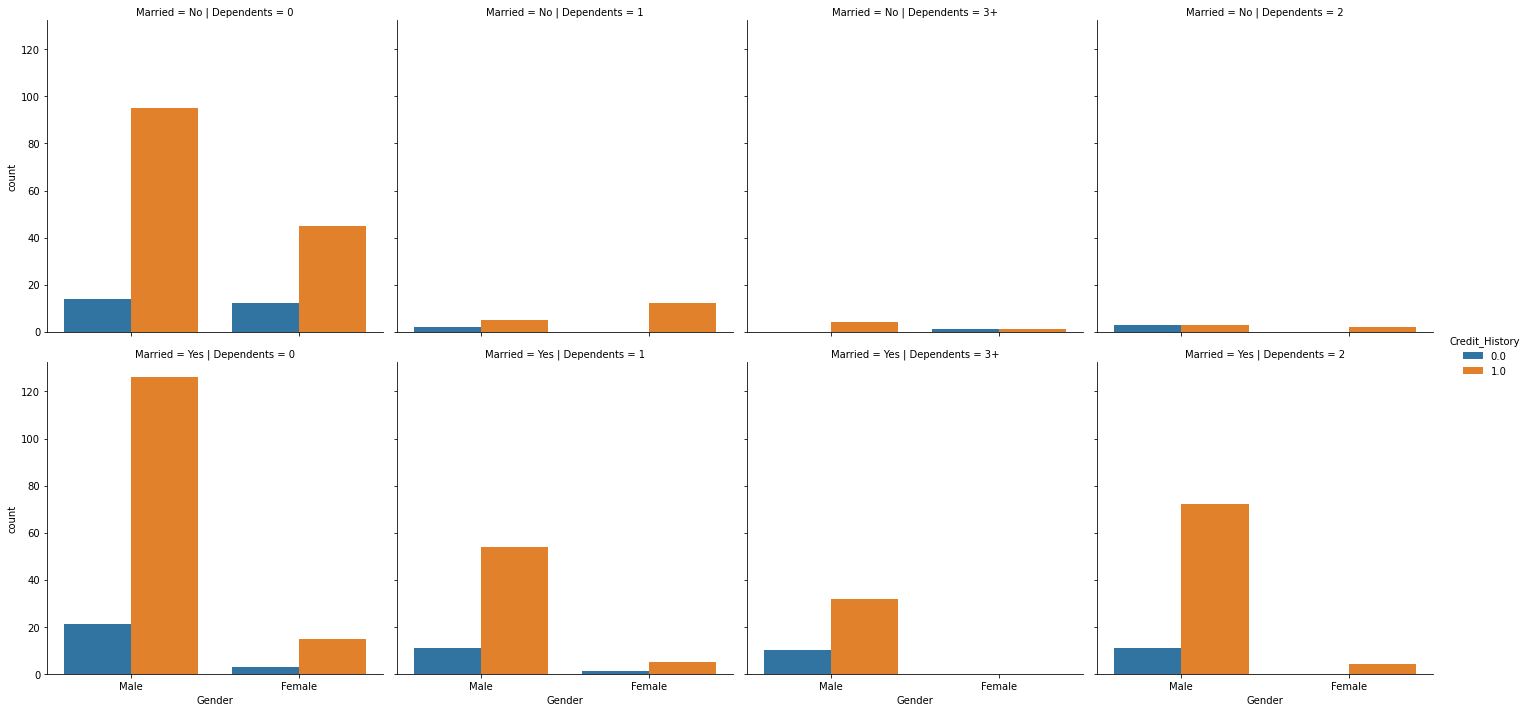

In [25]:
sns.catplot(x = 'Gender',row = 'Married',col = 'Dependents',hue = 'Credit_History',data = new,kind = 'count')

###### Verify if there is a section of society with no credit history. If yes what kind of customers have high no credit history. The plot gives no evidence of any section of society with high volume no credit history.

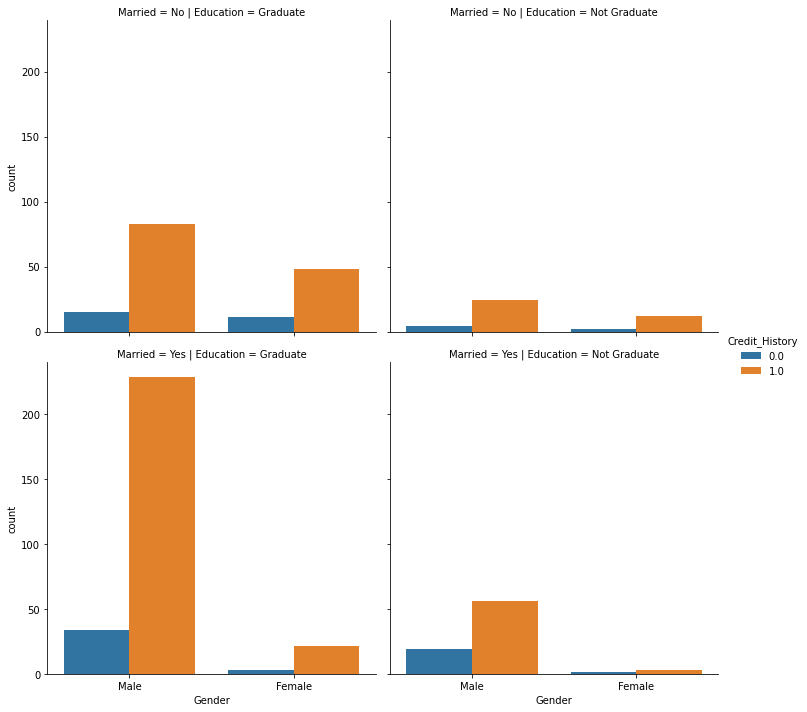

In [26]:
sns.catplot(x = 'Gender',row = 'Married',col = 'Education',hue = 'Credit_History',data = new,kind = 'count')

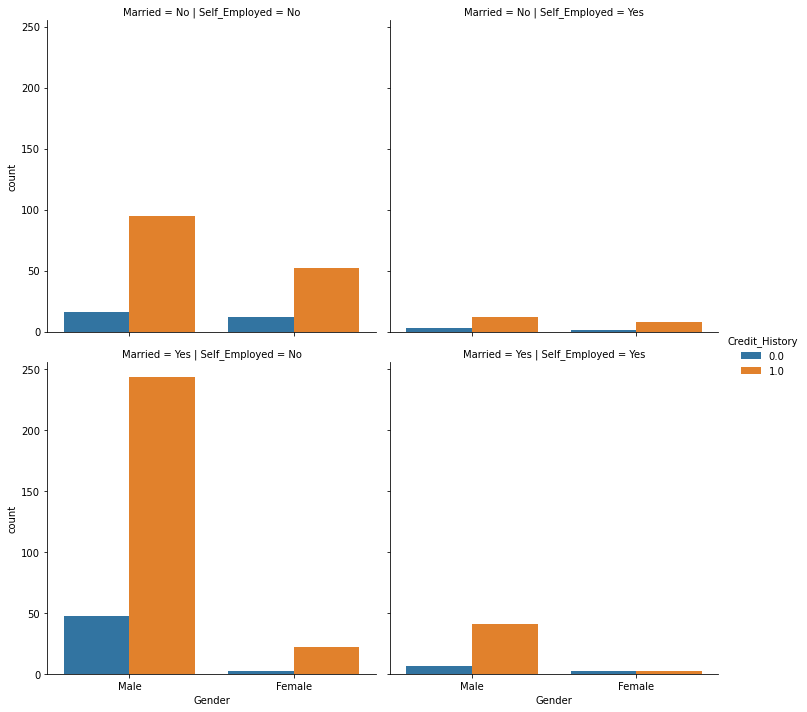

In [27]:
sns.catplot(x = 'Gender',row = 'Married',col = 'Self_Employed',hue = 'Credit_History',data = new,kind = 'count')

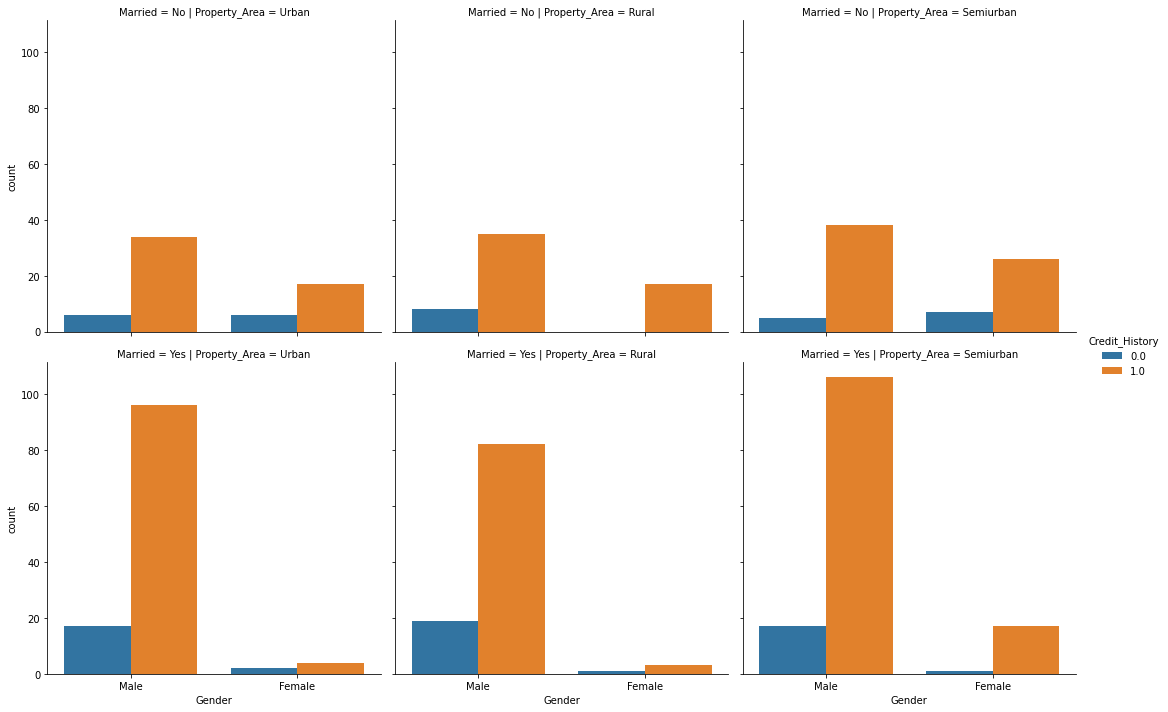

In [28]:
sns.catplot(x = 'Gender',row = 'Married',col = 'Property_Area',hue = 'Credit_History',data = new,kind = 'count')

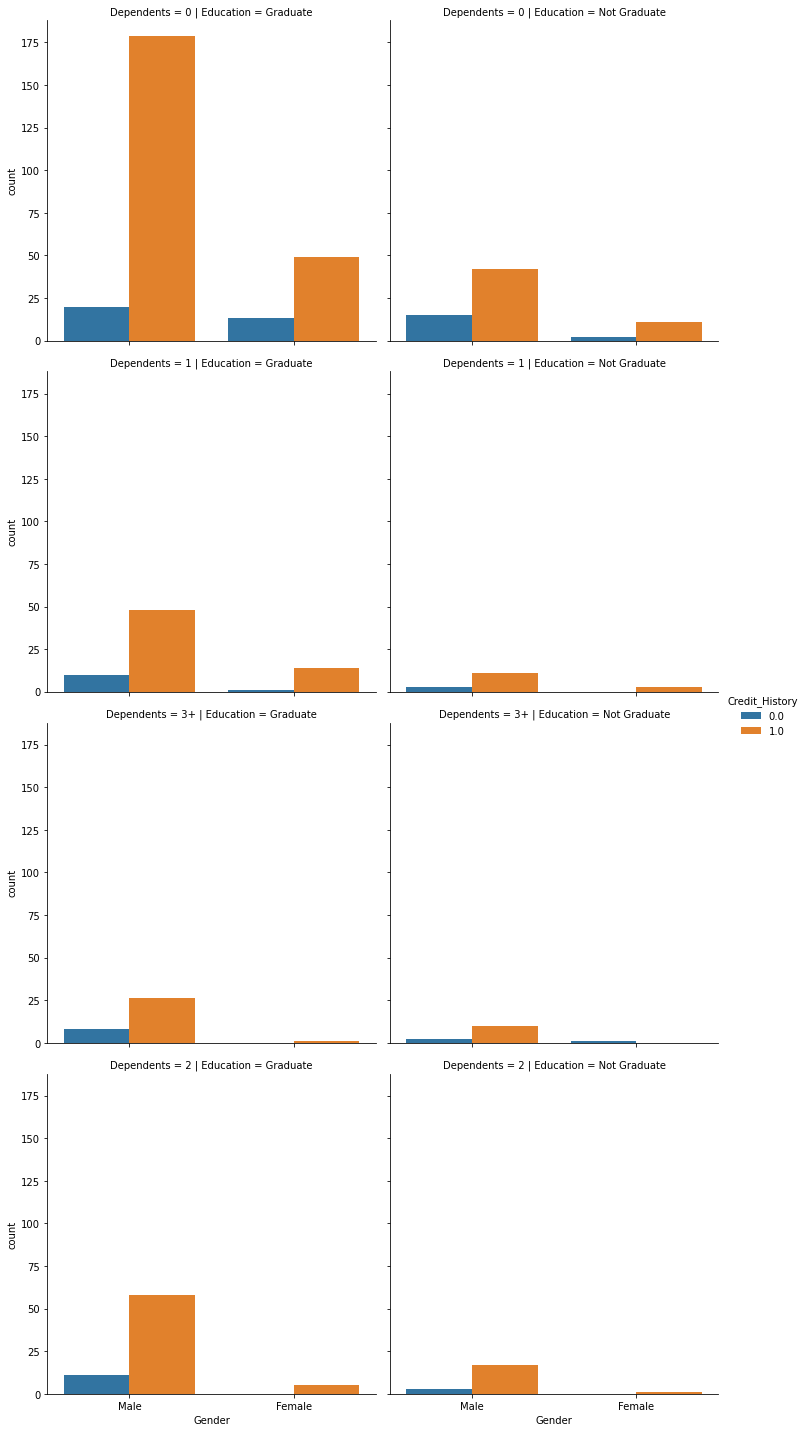

In [29]:
sns.catplot(x = 'Gender',row = 'Dependents',col = 'Education',hue = 'Credit_History',data = new,kind = 'count')

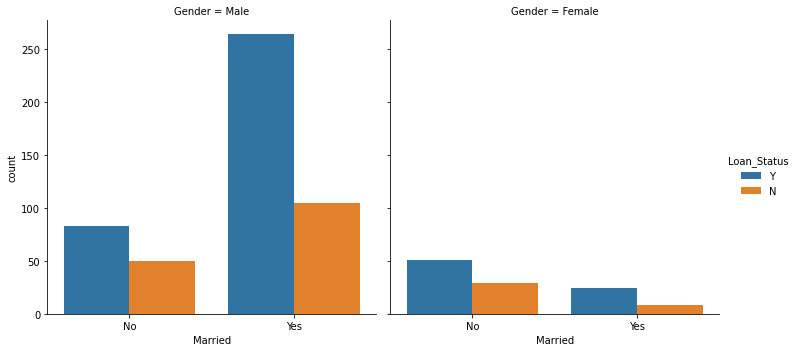

In [30]:
sns.catplot(x = 'Married',col = 'Gender',hue = 'Loan_Status',data = new,kind = 'count')

<AxesSubplot:xlabel='Education', ylabel='count'>

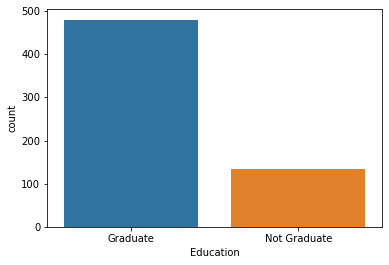

In [31]:
sns.countplot(x = 'Education',data = new)

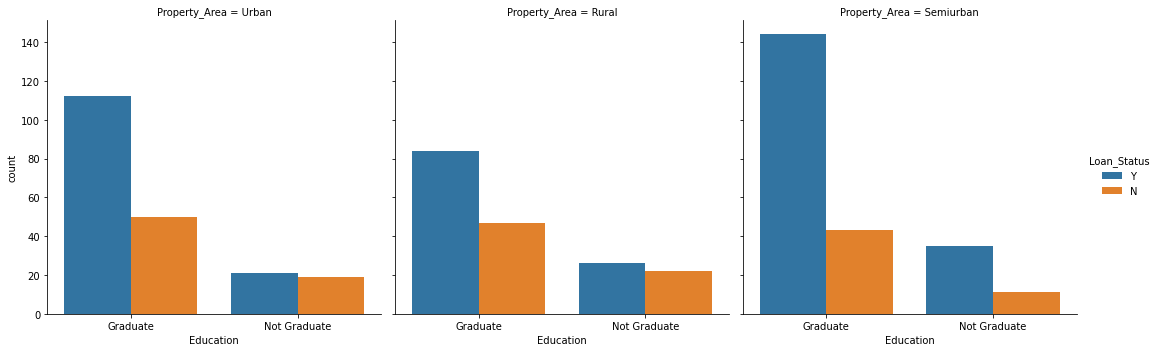

In [32]:
sns.catplot(x = 'Education',col = 'Property_Area',hue = 'Loan_Status',data = new,kind = 'count')

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

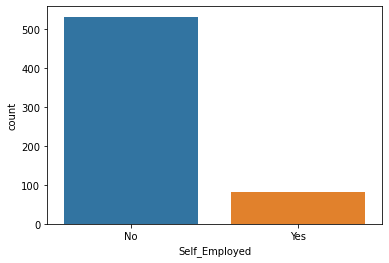

In [33]:
sns.countplot(x = 'Self_Employed',data = new)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

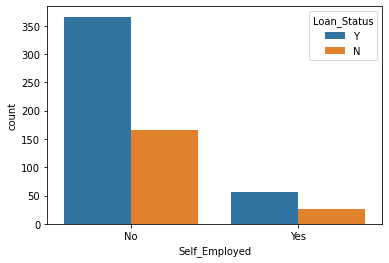

In [34]:
sns.countplot(x = 'Self_Employed',hue = 'Loan_Status',data = new)

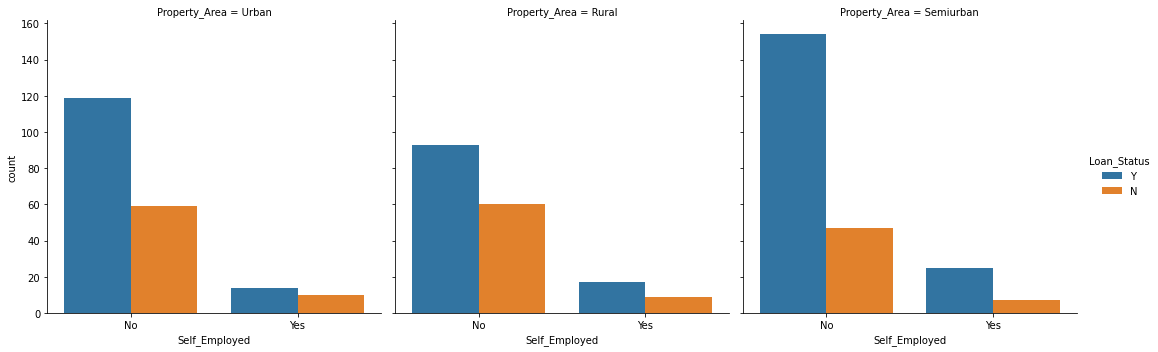

In [35]:
sns.catplot('Self_Employed',col = 'Property_Area',hue = 'Loan_Status',data = new,kind = 'count')

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

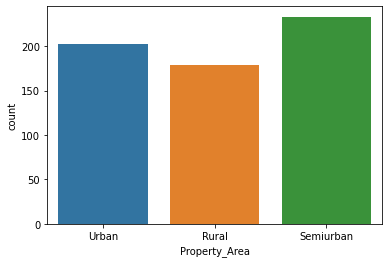

In [36]:
sns.countplot(x = 'Property_Area',data = new)

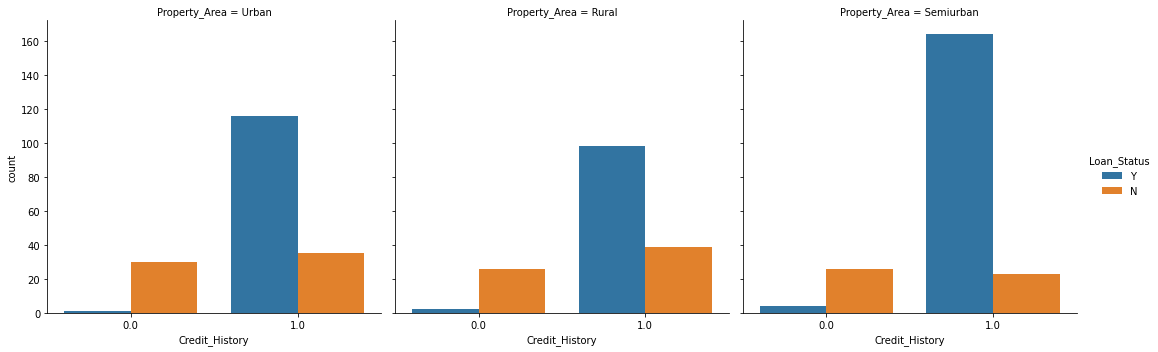

In [37]:
sns.catplot('Credit_History',col = 'Property_Area',hue = 'Loan_Status',data = new,kind = 'count')

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

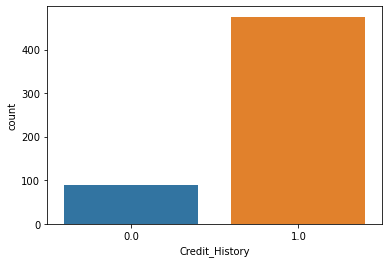

In [38]:
sns.countplot(x = 'Credit_History',data = new)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

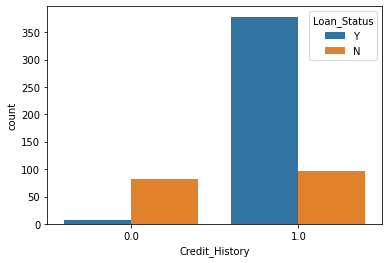

In [39]:
sns.countplot(x = 'Credit_History',hue = 'Loan_Status',data = new)

The above figure makes it evident that the loan approval for customers with credit History not meeting the guidelines have very minimal chances of approval.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

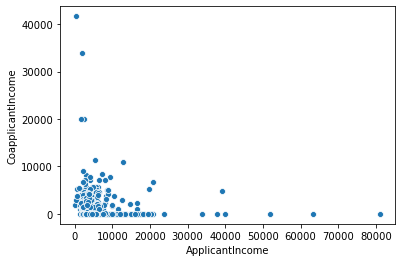

In [40]:
sns.scatterplot(x = 'ApplicantIncome',y = 'CoapplicantIncome', data = new)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

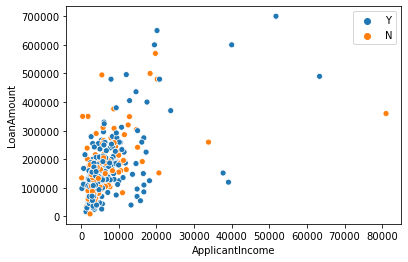

In [41]:
sns.scatterplot(x = 'ApplicantIncome',y = 'LoanAmount', hue = new.Loan_Status.tolist(),data = new)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='LoanAmount'>

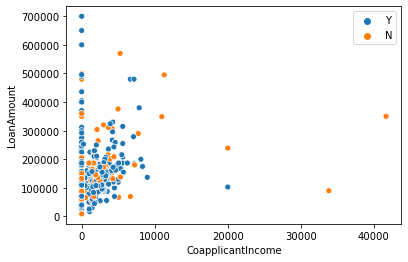

In [42]:
sns.scatterplot(x = 'CoapplicantIncome',y = 'LoanAmount', hue = new.Loan_Status.tolist(),data = new)

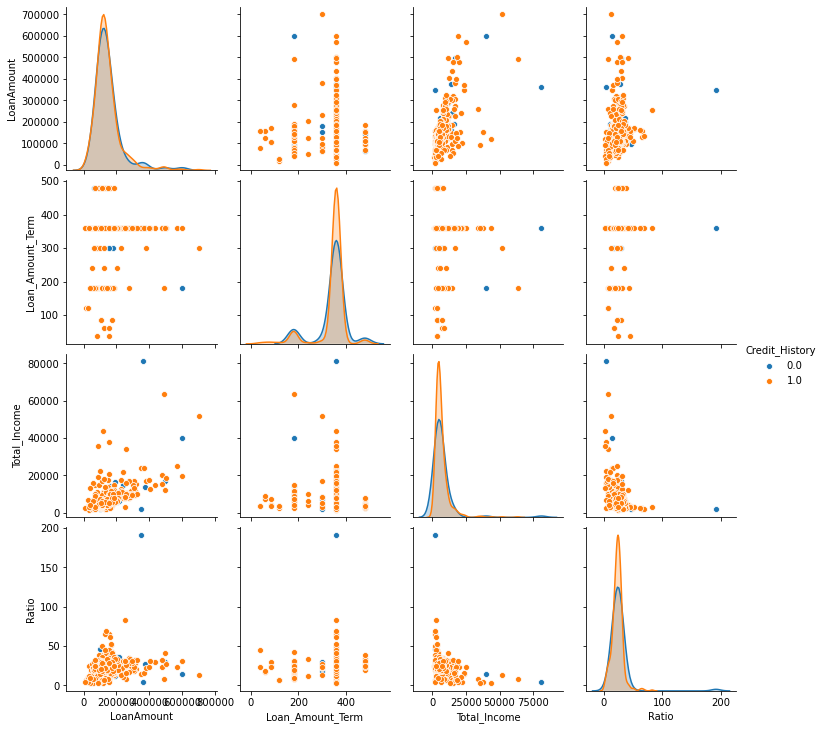

In [43]:
sns.pairplot(new.drop(['ApplicantIncome','CoapplicantIncome'],axis = 1),hue = 'Credit_History')

<AxesSubplot:xlabel='Total_Income', ylabel='LoanAmount'>

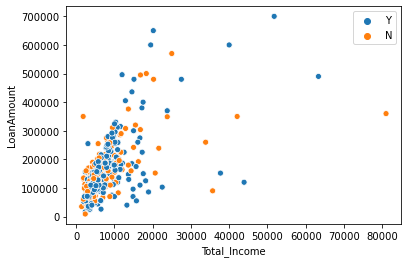

In [44]:
sns.scatterplot(x = 'Total_Income',y = 'LoanAmount',hue = new.Loan_Status.tolist(),data = new)

<AxesSubplot:xlabel='Ratio', ylabel='LoanAmount'>

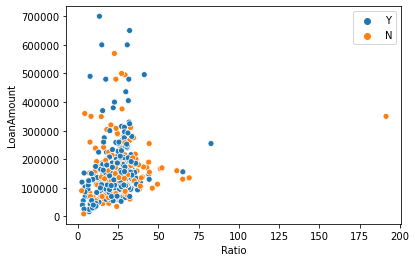

In [45]:
sns.scatterplot(x = 'Ratio',y = 'LoanAmount',hue = new.Loan_Status.tolist(),data = new)

<AxesSubplot:xlabel='Loan_Status', ylabel='Ratio'>

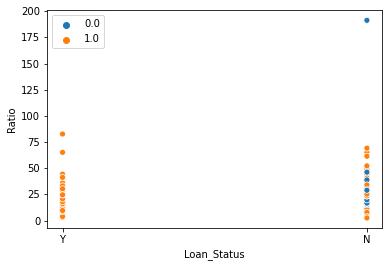

In [46]:
sns.scatterplot(x = 'Loan_Status',y = 'Ratio',hue = new[~new['Credit_History'].isna()].Credit_History.tolist(),data = new[~new['Credit_History'].isna()])

In [47]:
req = new[new['Credit_History'].isna()]
nreq = new[~new['Credit_History'].isna()]

news = {'Graduate':1.0,'Not Graduate':0.0}
req.loc[:,'Credit_History'] = req.loc[:,'Education'].map(news)

C:\Users\mdevasish\Anaconda3\envs\new_env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [48]:
final = req.append(nreq).reset_index()
final.drop(['index'],axis = 1,inplace = True)

In [49]:
final

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Loan_Status,Ratio
0,LP001326,Male,No,0,Graduate,No,6782,0.0,130371.428571,360,1.0,Urban,6782.0,N,19.223154
1,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100000.000000,240,0.0,Urban,3596.0,Y,27.808676
2,LP001052,Male,Yes,1,Graduate,No,3717,2925.0,151000.000000,360,1.0,Semiurban,6642.0,N,22.734116
3,LP001091,Male,Yes,1,Graduate,No,4166,3369.0,201000.000000,360,1.0,Urban,7535.0,N,26.675514
4,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75000.000000,360,1.0,Urban,2400.0,Y,31.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71000.000000,360,1.0,Rural,2900.0,Y,24.482759
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40000.000000,180,1.0,Rural,4106.0,Y,9.741841
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253000.000000,360,1.0,Urban,8312.0,Y,30.437921
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187000.000000,360,1.0,Urban,7583.0,Y,24.660425


In [50]:
final.to_csv('./Data/processed_file.csv',index = False)